# 캘리포니아 주택 가격 예측 모델 만들기

## Import resource

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. 데이터 가져오기

In [3]:
housing = pd.read_csv('datasets/housing.csv') # "/content/housing.csv"

## 2. 데이터 훑어보기

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

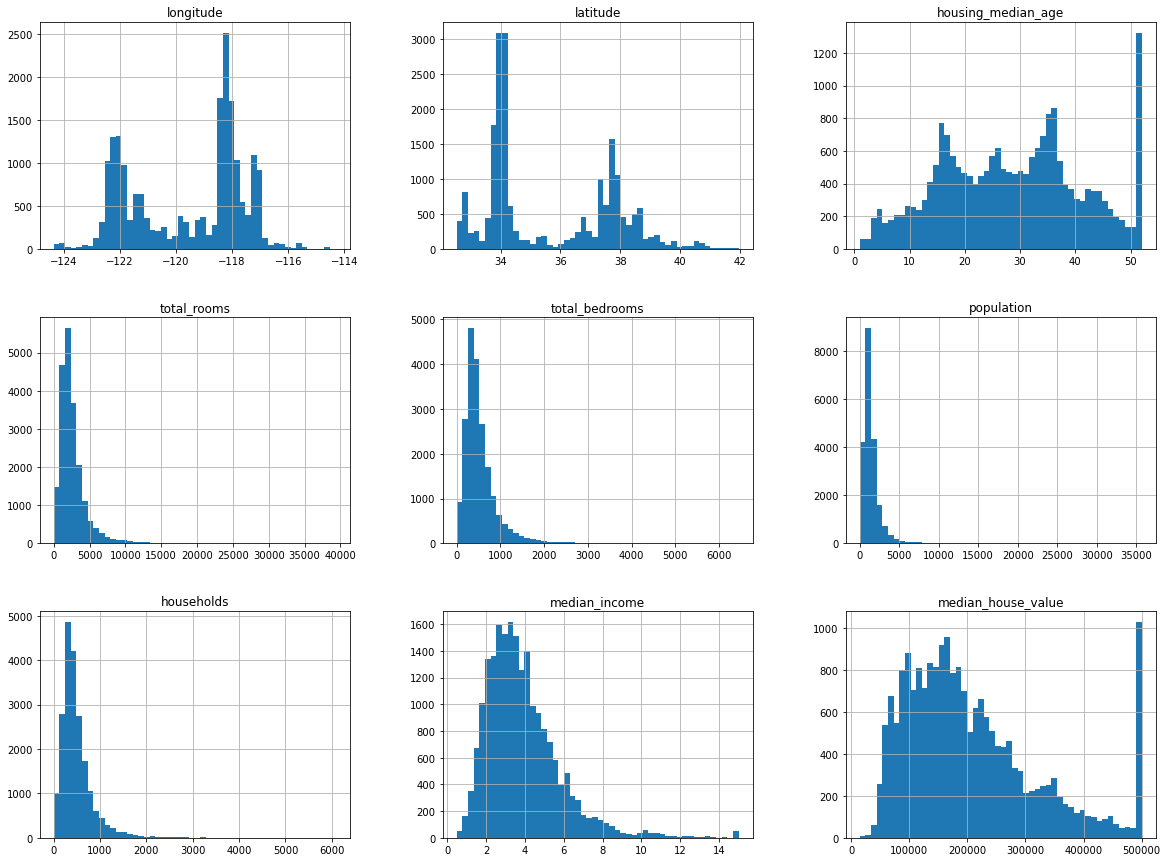

In [13]:
housing.hist(bins=50, figsize=(20, 15))

## 3. 데이터 세트 분리

In [ ]:
# 주택가격을 예측하는 중요한 특성의 분포가 각 데이터세트(Train/Test)에 잘 반영되야함
# 이 예제에서는 median_incom 으로 가정

<AxesSubplot:>

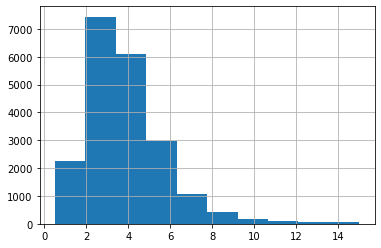

In [15]:
housing["median_income"].hist()

In [19]:
bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf]
labels = [1, 2, 3, 4, 5]
housing["income_cat"] = pd.cut(housing["median_income"], bins=bins, labels= labels)

In [25]:
# 0. 원본 housing data 기준 income_cat 분포
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [20]:
# 1. 무작위 추출
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [24]:
test_set["income_cat"].value_counts()/len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [21]:
# 2. 계층적 샘플링
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

In [23]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
## 원본 housing 데이터 기준 income_cat의 계층 분포가 잘 반영된 데이터는
## 계층적 샘플링(2번)을 한 strat_test_set임

In [26]:
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

In [ ]:
# strat_train_set : 훈련 데이터
# strat_test_set : 테스트 데이터

## 4. 데이터 탐색

In [27]:
housing = strat_train_set.copy()

### 4.1 지리적 데이터 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

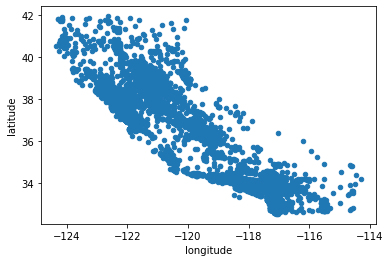

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

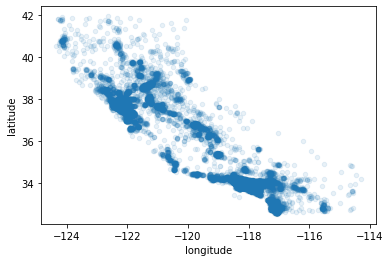

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # alpha : 투명도 조절 파라미터, 색이 진할 수록 데이터가 밀집

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

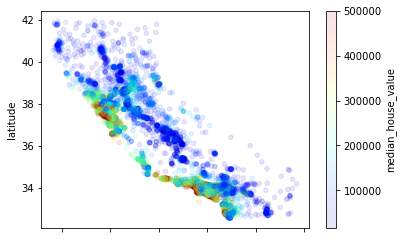

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) # color 정보로 주택가격을 알 수 있음

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

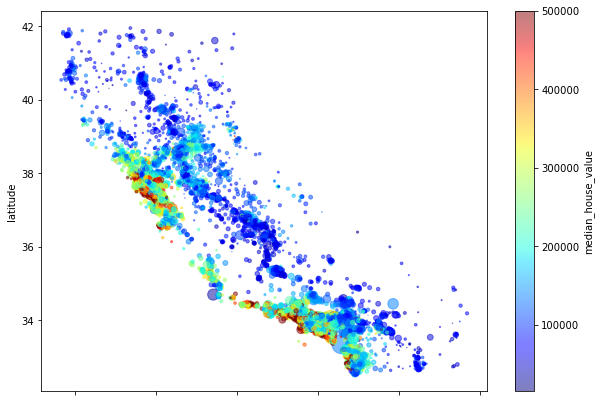

In [39]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            s = housing["population"]/100, figsize=(10, 7)) # size 정보를 통해 인구 정보를 알 수 있음

- (Question) 지리 정보를 통해 알수 있는것은?
- (Answer) 해안이고 밀집지역의 주택가격이 높음

### 4.2 상관관계 조사

In [42]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) # 내림차순

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

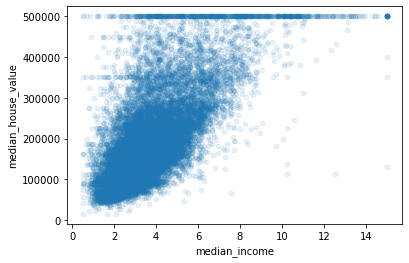

In [44]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### 4.3 특성 조합으로 실험

In [ ]:
# EDA : 궁극적으로 어떤 특성을 선택할지, 제거할지, 조합을 통해서 더 좋은 특성을 만들 수 있을지를 분석
#     : 시각화(데이터의 경향성, 왜곡, 아웃라이어, 통계적 정보), 상관계수, 결측치 등을 종합적으로 분석
#     : EDA의 결과로 모델링의 설계방향이 결정됨

In [45]:
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [52]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) # 내림차순

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## 5. 데이터 전처리 (머신러닝 알고리즘을 위한 데이터 준비)

In [56]:
# 특성값과 레이블 분리
housing = strat_train_set.drop("median_house_value", axis=1)     # 특성 데이터(X)
housing_labels = strat_train_set["median_house_value"].copy()    # 정답 데이터 (y)

### 5.1 데이터 전처리(1) - 결손값 처리

#### 5.1.1 Pandas 로 전처리

In [62]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
# option 1 : null이 있는 행(샘플)을 삭제

In [63]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"], axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
# option 2 : null이 있는 열(특성)을 삭제

In [64]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
# option 3 : null값을 대체

In [66]:
# before fillna
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [67]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
# after fillna
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


#### 5.1.2 Scikit-learn 으로 전처리

In [74]:
# "결측(누락)데이터를 대체"(=option 3)하는  변환기를 제공
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median") # 도움말 보기 : shift + tab

In [75]:
# 수치형 데이터 : housing_num = ~ ocean promity 
# 카테고리형 데이터 : housing_cat =  ocean proximity
# - 명목형 : 제조국, 탑승지, 클래스
# - 순서형 : 순위 (1, 2, 3)

In [76]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [77]:
# fit : 변환을 위한 준비작업 (중간값 구하기)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [78]:
# fit을 통해 구한 모든 특성의 중간 값
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [79]:
# transform : 실제 변환
X = imputer.transform(housing_num) # numpy 반환

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [ ]:
# scaler = StandardScaler()
# scaler.fit(____)  # 평균과 표준편차를 구함
# scaler.transform(___) # 실제 변환

In [81]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [84]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [89]:
sample_incomplete_rows.index.values

array([ 1606, 10915, 19150,  4186, 16885], dtype=int64)

In [91]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


### 데이터 전처리(2) - 데이터 인코딩

In [103]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


#### 1) 레이블 인코딩

In [95]:
# pandas
pd.factorize(housing["ocean_proximity"])

(array([0, 1, 0, ..., 2, 2, 0], dtype=int64),
 Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [97]:
# scikit-learn
from sklearn.preprocessing import OrdinalEncoder # LabelEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

#### 2) 원-핫 인코딩

In [98]:
# pandas
pd.get_dummies(housing_cat)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0,1,0,0,0
15502,0,0,0,0,1
2908,0,1,0,0,0
14053,0,0,0,0,1
20496,1,0,0,0,0
...,...,...,...,...,...
15174,1,0,0,0,0
12661,0,1,0,0,0
19263,1,0,0,0,0
19140,1,0,0,0,0


In [99]:
# scikit-learn
from sklearn.preprocessing import OneHotEncoder

# sparse=True
onehot_encoder = OneHotEncoder()
housing_cat_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [100]:
housing_cat_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [101]:
# sparse=False
onehot_encoder = OneHotEncoder(sparse=False)
housing_cat_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [102]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 데이터 전처리(3) - 특성 스케일링

In [104]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler() # 평균 0, 표준편차 1
housing_num_standardized = std_scaler.fit_transform(housing_num)
housing_num_standardized

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [107]:
housing_num_standardized.mean(0)

array([-5.24924634e-15,  2.81159678e-16,  8.77850764e-17, -1.54914841e-17,
                   nan,  6.45478503e-19, -1.05428155e-17,  1.14841384e-16])

In [108]:
housing_num_standardized.std(0)

array([ 1.,  1.,  1.,  1., nan,  1.,  1.,  1.])

### 데이터 전처리(4) - 변환 파이프라인

In [126]:
# 나만의 변환기 만들기
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, housholds_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] /  X[:, housholds_ix]
        population_per_household = X[:, population_ix] / X[:, housholds_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room] # 3개 특성 추가해서 반환
        else:
            return np.c_[X, rooms_per_household, population_per_household] # 2개 특성 추가해서 반환
            
        # housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
        # housing["population_per_household"] = housing["population"] / housing["households"]
    
        # housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

In [128]:
from sklearn.pipeline import Pipeline

# 수치형 특성 파이프라인
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")), # 1. 누락 데이터를 중간값으로 대체하는 변환기 : SimpleImputer
         ("attribs_adder", CombinedAttributesAdder()), # 2. 특성 조합(3) 추가하기 - 나만의 변환기
        ("std_scaler", StandardScaler()), # 3. 특성 스케일링 - 표준화 : StandardScaler    
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [129]:
housing_num_tr.shape

(16512, 11)

In [ ]:
# 범주형 특성
# OneHotEncoder

In [114]:
from sklearn.compose import ColumnTransformer 

In [118]:
num_attribs = list(housing_num.columns.values)
cat_attribs = ["ocean_proximity"]

In [130]:
# ColumnTransformer([
#     (이름, 변환기(파이프라인), 컬럼명), # 수치형 특성 전처리
#     (이름, 변환기(파이프인), 컬럼명), # 범주형 특성 전처리
# ])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), # 수치형 특성 전처리
    ("cat", OneHotEncoder(), cat_attribs), # 범주형 특성 전처리
])

housing_prepared = full_pipeline.fit_transform(housing)

In [131]:
housing_num.shape #8->11 변환될 예정

(16512, 8)

In [132]:
housing_cat.shape # 1->5 변환될 예정

(16512, 1)

In [133]:
housing_prepared.shape # 11(num) + 5(cat)

(16512, 16)

## 6. 모델 선택과 훈련

### 선형회귀 모델

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score # R2

In [135]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# 예측과 성능평가에 훈련데이터(X_train, y_train)가 사용되었음
# 원래는 테스트 데이터(X_test, y_test)가 사용되어야 함
# 이 후에 교차검증을 통해서 제대로 평가할 예정

In [138]:
housing_prediction = lin_reg.predict(housing_prepared)

In [139]:
lin_mse = mean_squared_error(housing_labels, housing_prediction) # 정답, 예측
lin_mse

4709785076.060029

In [140]:
lin_rmse = mean_squared_error(housing_labels, housing_prediction, squared=False) # 정답, 예측
lin_rmse

68627.87390018745

In [141]:
lin_mae = mean_absolute_error(housing_labels, housing_prediction)
lin_mae

49438.66860915802

In [142]:
r2_score(housing_labels, housing_prediction) # 정답, 실제

0.6481553634454353

In [143]:
lin_reg.score(housing_prepared, housing_labels) # X_train, y_train (원래는 X_test, y_test이 들어가야 함)

0.6481553634454353

### 결정 트리 모델

In [144]:
from sklearn.tree import DecisionTreeRegressor # DecisionTreeClassifier는 분류기

In [145]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [147]:
housing_prediction = tree_reg.predict(housing_prepared)

In [148]:
tree_rmse = mean_squared_error(housing_labels, housing_prediction, squared=False) # 정답, 예측
tree_rmse

0.0

In [149]:
tree_reg.score(housing_prepared, housing_labels)

1.0

In [164]:
tree_reg.feature_importances_

array([0.06605444, 0.0554162 , 0.04121725, 0.01359154, 0.01073653,
       0.01136135, 0.01186012, 0.47162161, 0.02866633, 0.12272177,
       0.02350938, 0.00109683, 0.14022016, 0.        , 0.00056603,
       0.00136047])

### 교차 검증을 사용한 평가

* 결정트리 모델

In [150]:
from sklearn.model_selection import cross_val_score

In [152]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                scoring="neg_mean_squared_error", cv=10) #모델, 특성 데이터, 정답데이터, scoring= 성능 측정 지표, cv(폴드수)

In [158]:
scores # 교차검증했던 10개의 negative mean squared error

array([-5.30442120e+09, -4.89624653e+09, -4.83422142e+09, -5.25882875e+09,
       -4.78110018e+09, -6.25597809e+09, -4.75548787e+09, -5.37941601e+09,
       -4.87567373e+09, -5.05195379e+09])

In [159]:
(- scores) # 교차검증했던 10개의 mean squared error

array([5.30442120e+09, 4.89624653e+09, 4.83422142e+09, 5.25882875e+09,
       4.78110018e+09, 6.25597809e+09, 4.75548787e+09, 5.37941601e+09,
       4.87567373e+09, 5.05195379e+09])

In [160]:
np.sqrt(- scores) # 교차검증했던 10개의 root mean squared error

array([72831.45749112, 69973.18438322, 69528.56551415, 72517.78229792,
       69145.50006909, 79094.74123727, 68960.045444  , 73344.50225684,
       69826.02473916, 71077.09753998])

In [161]:
np.sqrt(- scores).mean() # 교차검증했던 10개의 root mean squared error의 "평균"

71629.89009727491

* 선형 회귀 모델

In [162]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                scoring="neg_mean_squared_error", cv=10) #모델, 특성 데이터, 정답데이터, scoring= 성능 측정 지표, cv(폴드수)

In [163]:
np.sqrt(- scores).mean() # 교차검증했던 10개의 root mean squared error의 "평균"

69104.07998247063

### 랜덤 포레스트 모델

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [167]:
housing_predictions = forest_reg.predict(housing_prepared) # 훈련데이터로 예측하면 안됨
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
forest_rmse 

18650.698705770003

In [168]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                scoring="neg_mean_squared_error", cv=10) #모델, 특성 데이터, 정답데이터, scoring= 성능 측정 지표, cv(폴드수)

In [169]:
np.sqrt(- scores).mean() # 교차검증했던 10개의 root mean squared error의 "평균"

50435.58092066179

## 7. 모델 세부 튜닝

### 그리드 탐색

In [171]:
from sklearn.model_selection import GridSearchCV

In [188]:
param_grid =[
    {"n_estimators" : [3, 10, 30], "max_features" : [2, 4, 6, 8]}, # 3*4 =12
    {"bootstrap" : [False], "n_estimators" : [3, 10], "max_features" : [2, 3, 4]} # 1*2*3 =6
]

# param_grid =[
#     {"bootstrap" : [True], "n_estimators" : [30, 40, 50, 60], "max_features" : [8, 10, 12]}, # 3*4 =12 
#     {"bootstrap" : [False], "n_estimators" : [3, 10], "max_features" : [2, 3, 4]} # 1*2*3 =6
# ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
%time grid_search.fit(housing_prepared, housing_labels)

Wall time: 26.1 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [189]:
grid_search.best_params_ #18개의 조합(18개의 모델)중 최적의 파라미터

{'max_features': 8, 'n_estimators': 30}

In [190]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [191]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### 랜덤 탐색

In [185]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [193]:
param_distribs = {
    "n_estimators" : randint(low=1, high=200),
    "max_features" : randint(low=1, high=8)    
}

rnd_search = RandomizedSearchCV(forest_reg, param_distribs, n_iter=10, cv=5,
                                  scoring="neg_mean_squared_error", n_jobs=-1, random_state=42) # 10*5회의 훈련과 검증
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026D87D0C400>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026D87C69190>},
                   random_state=42, scoring='neg_mean_squared_error')

In [194]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [212]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [213]:
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [210]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_attribs = list(cat_encoder.categories_[0])
extra_attribs = ['roomps_per_hhold','pop_per_hhold','bedrooms_per_hhold']
attributes = num_attribs + extra_attribs + cat_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'roomps_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_hhold',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [220]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'roomps_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_hhold'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

## 예측과 성능 평가

In [ ]:
## 마지막 단계 : 테스트 데이터를 pipeline으로 변환시켜서 예측, 성능 평가

In [221]:
final_model = grid_search.best_estimator_

In [223]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [229]:
X_test_prepared = full_pipeline.transform(X_test)

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [231]:
final_prediction = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_prediction, squared=False)
final_rmse

47873.26095812988

## joblib를 사용한 모델 저장

In [ ]:
import joblib

In [232]:
# option 1 : 모델만 저장
joblib.dump(final_model, "my_model.pkl")

['my_model.pkl']

In [ ]:
# option  2 : 전처리기와 예측모델을 함께 저장

In [237]:
# Pipeline([
#     "", 전처리기
#     "", 최종모델
# ])

full_pipeline_with_predictor = Pipeline([
                                ("preparation", full_pipeline), # 전처리기
                                ("final", final_model)          # 예측기(모델)
                            ])

In [240]:
housing.shape, housing_labels.shape

((16512, 9), (16512,))

In [241]:
full_pipeline_with_predictor.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [242]:
joblib.dump(full_pipeline_with_predictor, "my_model.pkl")

['my_model.pkl']

In [243]:
# 시간이 지난 뒤에 가져오는 방법
loaded_model = joblib.load("my_model.pkl")

In [ ]:
loaded_model.predict() # 전처리전의 데이터 형태로 : 샘플개수*9